In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno as msno 
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
# Cargar el DataFrame
df = pd.read_csv('rama_2023_05_missing_outliers_limited.csv')


In [46]:
# Reemplazar valores -99 con NaN
#df.replace(-99, np.nan, inplace=True)

Cambiar la columna de fecha en indice

In [13]:
# Convertir la columna 'Fecha' al formato específico
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

In [14]:
# Verificar si hay fechas que no se pudieron convertir
invalid_dates = df[df['fecha'].isna()]
if not invalid_dates.empty:
    print("Fechas no convertidas correctamente:")
    print(invalid_dates)


df.set_index('fecha',inplace=True)


In [15]:
df.head(5) #Observamos los primeros 5 filas del data frame

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,NaN
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
2015-01-04,0.726940,24.606272,19.560976,NaN,17.329032,39.961538,16.838284,1.809061
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,NaN,8.315789


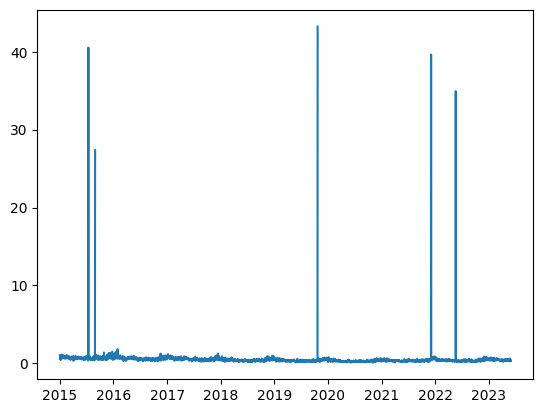

In [16]:
plt.plot(df.index,df['CO'])

<function matplotlib.pyplot.show(close=None, block=None)>

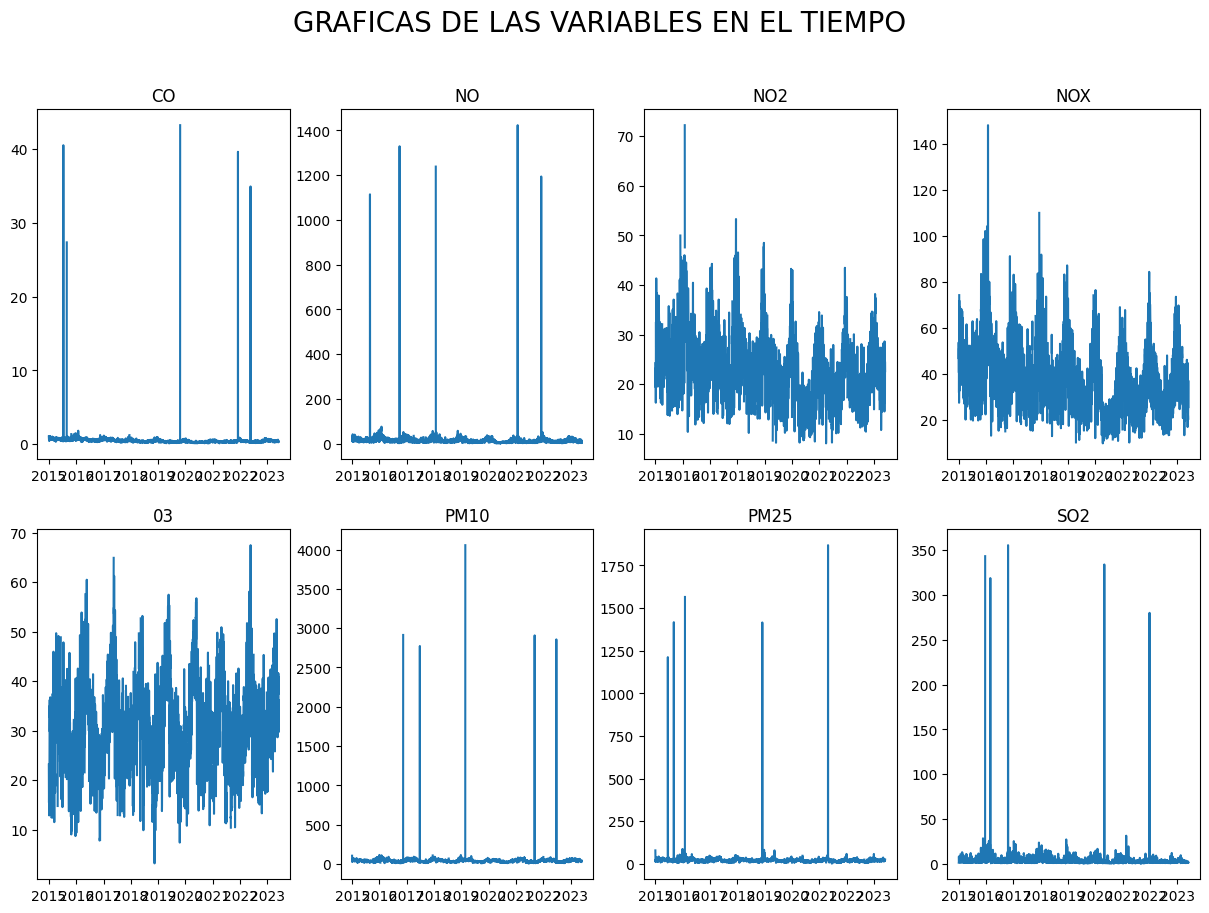

In [17]:
fig, axs = plt.subplots(2,4,figsize= (15,10))

axs[0,0].plot(df.index,df['CO'],label='CO')
axs[0,0].set_title('CO')


axs[0,1].plot(df.index,df['NO'])
axs[0,1].set_title('NO')

axs[0,2].plot(df.index,df['NO2'])
axs[0,2].set_title('NO2')

axs[0,3].plot(df.index,df['NOX'])
axs[0,3].set_title('NOX')

axs[1,0].plot(df.index,df['O3'])
axs[1,0].set_title('03')

axs[1,1].plot(df.index,df['PM10'])
axs[1,1].set_title('PM10')

axs[1,2].plot(df.index,df['PM25'])
axs[1,2].set_title('PM25')

axs[1,3].plot(df.index,df['SO2'])
axs[1,3].set_title('SO2')

fig.suptitle('GRAFICAS DE LAS VARIABLES EN EL TIEMPO',fontsize = 20)
plt.show

Sustituyendo valores atipicos por valores nulos

In [31]:
df.loc[df['CO']>3,'CO']= np.nan
df.loc[df['NO']>50,'NO']= np.nan
df.loc[df['NO2']>45,'NO2']= np.nan
df.loc[df['NOX']>100,'NOX']= np.nan
df.loc[df['O3']>55,'O3']= np.nan
df.loc[df['PM10']>150,'PM10']= np.nan
df.loc[df['PM25']>45,'PM25']= np.nan
df.loc[df['SO2']>55,'SO2']= np.nan


<Axes: xlabel='fecha'>

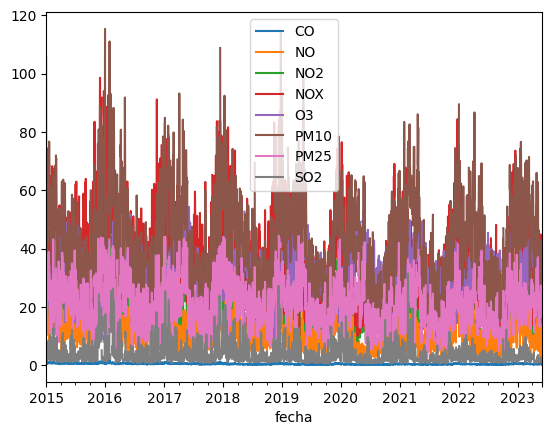

In [32]:
df.plot()

In [33]:
#!pip install scikit-learn

In [34]:
from sklearn.impute import KNNImputer

imputar valores nulos

In [35]:
df.isnull().sum()

CO      162
NO      170
NO2     171
NOX     147
O3      174
PM10    147
PM25    184
SO2     178
dtype: int64

In [36]:
# Crear una instancia del imputador KNN con 12 vecinos
imputer_knn = KNNImputer(n_neighbors=12)

Primeras filas del DataFrame filtrado:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976        NaN  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

                 PM25       SO2  
fecha                            
2015-01-01        NaN       NaN  
2015-01-02  15.449438       NaN  
2015-01-03  12.915129  1.436937  
2015-01-04  16.838284  1.809061  
2015-01-05        NaN  8.315789  


<Figure size 1200x600 with 0 Axes>

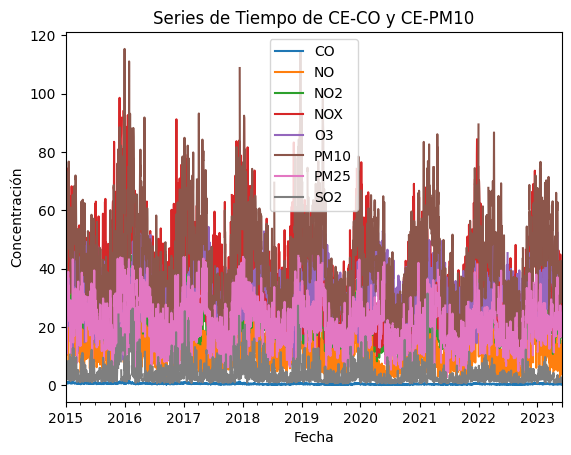


Número de valores nulos antes de la imputación:
CO      162
NO      170
NO2     171
NOX     147
O3      174
PM10    147
PM25    184
SO2     178
dtype: int64

Primeras filas del DataFrame después de la imputación y adición de columnas:
                  CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976  45.643463  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   

                 PM25       SO2  julian_day  
fecha                                        
2015-01-01  21.096270  4.705077           1  
2015-01-02  15.449438  2.671602           2  
2015-01-03  12.9151

<Figure size 1200x600 with 0 Axes>

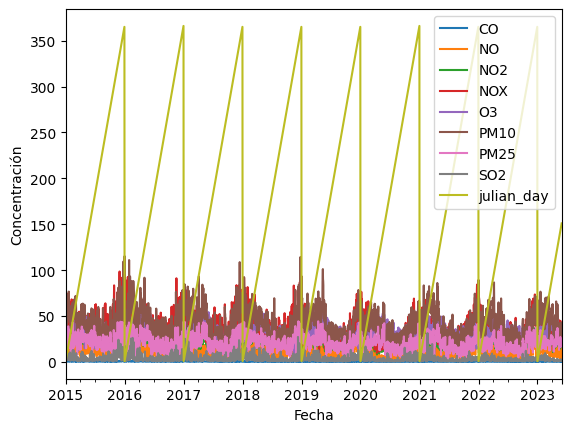

In [37]:
df_impute = df.copy()
# Mostrar las primeras filas del DataFrame filtrado
print("Primeras filas del DataFrame filtrado:")
print(df_impute.head())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10'
plt.figure(figsize=(12, 6))
df_impute.plot()
plt.title('Series de Tiempo de CE-CO y CE-PM10')
plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()

# Contar y mostrar el número de valores nulos en cada columna del DataFrame filtrado
print("\nNúmero de valores nulos antes de la imputación:")
print(df_impute.isnull().sum())
# Aplicar el imputador KNN para llenar los valores nulos en el DataFrame
df_impute.loc[:, :] = imputer_knn.fit_transform(df_impute)

# Agregar una columna con el día juliano (día del año)
df_impute['julian_day'] = df_impute.index.dayofyear

# Agregar una columna con la hora del día
#df_impute['hour'] = df_impute.index.hour

# Mostrar las primeras filas del DataFrame después de la imputación y adición de columnas
print("\nPrimeras filas del DataFrame después de la imputación y adición de columnas:")
print(df_impute.head())

# Contar y mostrar el número de valores nulos después de la imputación
print("\nNúmero de valores nulos después de la imputación:")
print(df_impute.isnull().sum())

# Graficar las series de tiempo de 'CE-CO' y 'CE-PM10' después de la imputación
plt.figure(figsize=(12, 6))
df_impute.plot()

plt.xlabel('Fecha')
plt.ylabel('Concentración')
plt.show()



In [38]:
df_impute.to_csv('Archivolisto.csv',index=False)